# tests

## read

In [169]:
test_ies_files = list(Path('./tests/ies_files').iterdir())

for filename in test_ies_files:
    if filename.suffix == '.ies':
        print(filename)
        lampdict = read_ies_data(filename)

tests/ies_files/B1 module.ies
tests/ies_files/B1.5 module.ies
tests/ies_files/LLIA001477-002.ies
tests/ies_files/LLIA001477-003.ies
tests/ies_files/write_test_full.ies
tests/ies_files/write_test_original.ies


# create unbugged lumenizer-002 version

## compare mine and lumen's ies file for lumenizer v2

/mnt/c/data/business/work/uvc/repos/ies_utils/ies_utils/_interpolate.py:18: UserWarning: Interpolated dictionary already exists. New interpolation not performed.
  warnings.warn(msg)


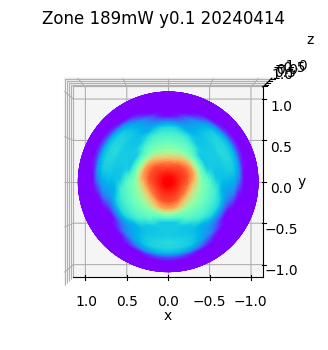

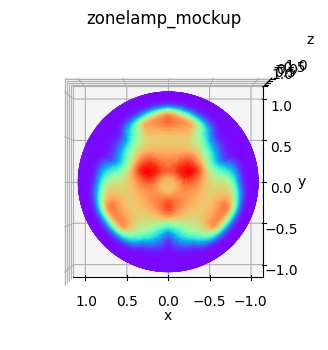

In [148]:
pathname = iesroot / 'LumenLabs' / 'lumenizer_v2'
filenames = [
    pathname  / 'Zone 189mW y0.1 20240414.ies',
    pathname / "zonelamp_mockup.ies"
    pathname / "zonelamp_mockup_balanced.ies"
]
[plot_ies(fname,title=fname.stem,which='interpolated') for fname in filenames];

In [151]:
pathname = iesroot / 'LumenLabs' / 'lumenizer_v2'
filenames = [
    pathname  / 'Zone 189mW y0.1 20240414.ies',
    pathname / "zonelamp_mockup.ies",
    pathname / "zonelamp_mockup_balanced.ies"
]
[total_optical_power(fname) for fname in filenames]

[19.016149353238934, 204.80435082056945, 191.60007854580155]

## load original

In [38]:
pathname = iesroot / 'LumenLabs' / 'lumenizer_v1'
fname = pathname/'LLIA001477-002.ies'
lampdict = read_ies_data(fname)
interpdict = lampdict['interp_vals']
total_optical_power(fname)

53.76239372519082

## take a third slice

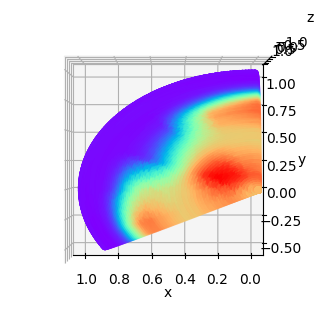

In [35]:
lobedict = {}
lobedict['phis'] = interpdict['phis'][0:121]
lobedict['thetas'] = interpdict['thetas']
lobedict['values'] = interpdict['values'][0:121]
plot_valdict(lobedict);

## fill in vals

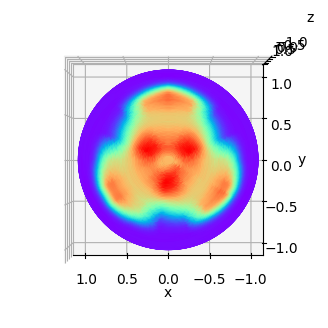

In [40]:
vals1 = lobedict['values']
vals2 = np.flip(lobedict['values'][:-1],axis=0)
vals3 =  np.flip(lobedict['values'][:-1],axis=0)
newvals = np.concatenate([vals1,vals2,vals3])

scale = 189/53.76239372519082

newdict = {}
newdict['values'] = newvals*scale
newdict['phis'] = np.linspace(0,360,361)
newdict['thetas'] = interpdict['thetas']

plot_valdict(newdict);

## write

In [41]:
outfile = iesroot / 'LumenLabs' / 'lumenizer_v2' / 'zonelamp_mockup_balanced.ies'
lampdict['newvals'] = newdict
write_ies_data(outfile, lampdict,'newvals')

## compare

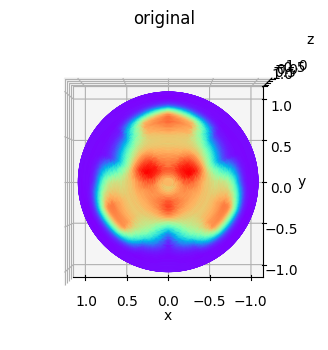

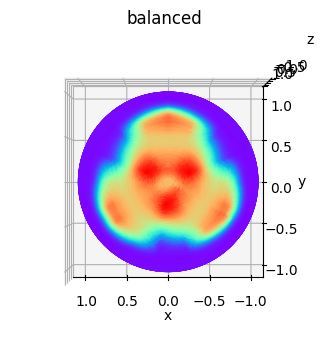

In [42]:
pathname = iesroot / 'LumenLabs' / 'lumenizer_v2'
fname = pathname / 'zonelamp_mockup.ies'
plot_ies(fname,title='original')
fname = pathname / 'zonelamp_mockup_balanced.ies'
plot_ies(fname,title='balanced')

# matrix manipulations

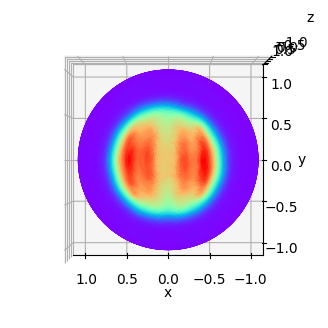

In [152]:
pathname = iesroot / 'LumenLabs' / 'lumenizer_v2' 
fname = pathname / 'ZONE lpack 2A -ry0.1.ies'
lampdict = read_ies_data(fname)
plot_ies(fname)

In [153]:
import numpy as np
from scipy.ndimage import map_coordinates

def rotate(valdict,delta_theta,delta_phi):
    
    newdict = valdict.copy()
    data = newdict['values']
    
    num_phis, num_thetas = values.shape
    # Convert indices to angles in degrees
    theta = valdict['thetas']  # theta from 0 to 180 degrees
    phi = valdict['phis']     # phi from 0 to 360 degrees
    
    Theta, Phi = np.meshgrid(theta, phi, indexing='ij')
    Theta_rotated = (Theta + delta_theta) % 181
    Phi_rotated = (Phi + delta_phi) % 361
    
    # Convert rotated spherical coordinates back to index space for interpolation
    theta_idx = Theta_rotated / 180 * (num_thetas-1)
    phi_idx = Phi_rotated / 360 * (num_phis-1)
    phiflat,thetaflat = phi_idx.flatten(), theta_idx.flatten()
    rotated_data = map_coordinates(values, [phiflat,thetaflat], order=1, mode='wrap')
    rotated_data = rotated_data.reshape(num_thetas,num_phis).T

    rotdict = newdict.copy()
    rotdict['values'] = rotated_data
    return rotdict


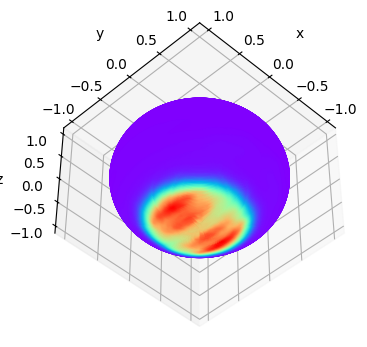

In [128]:

pathname = iesroot / 'LumenLabs' / 'lumenizer_v2' 
fname = pathname / 'ZONE lpack 2A -ry0.1.ies'
lampdict = read_ies_data(fname)
valdict = lampdict['interp_vals']

plot_valdict(newdict,azim=45,elev=-45);

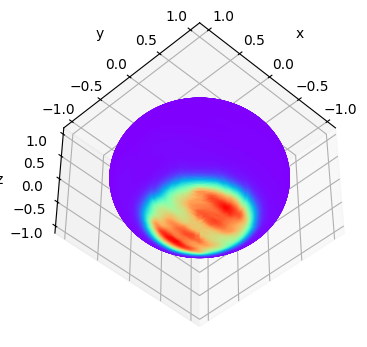

In [134]:
rotdict = rotate(valdict,0,90)
plot_valdict(rotdict,azim=45,elev=-45);

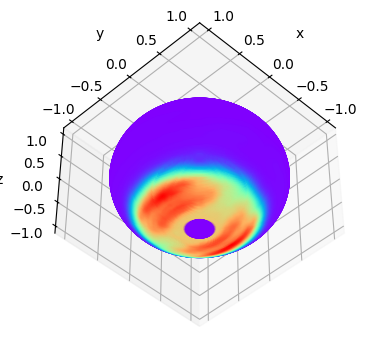

In [157]:
theta = -10
plot_valdict(rotate(valdict,theta,0),azim=45,elev=-45);

In [163]:
values[0]

array([5.3569380e+00, 5.3606080e+00, 5.3642780e+00, 5.3408175e+00,
       5.3173570e+00, 5.2971685e+00, 5.2769800e+00, 5.2294355e+00,
       5.1818910e+00, 5.1405345e+00, 5.0991780e+00, 5.0834875e+00,
       5.0677970e+00, 5.0434860e+00, 5.0191750e+00, 4.9254545e+00,
       4.8317340e+00, 4.8030270e+00, 4.7743200e+00, 4.7264885e+00,
       4.6786570e+00, 4.5960510e+00, 4.5134450e+00, 4.4380550e+00,
       4.3626650e+00, 4.2364970e+00, 4.1103290e+00, 3.9654230e+00,
       3.8205170e+00, 3.5859105e+00, 3.3513040e+00, 3.0235305e+00,
       2.6957570e+00, 2.3642950e+00, 2.0328330e+00, 1.7335065e+00,
       1.4341800e+00, 1.1927430e+00, 9.5130600e-01, 7.7479750e-01,
       5.9828900e-01, 4.7614000e-01, 3.5399100e-01, 2.8428700e-01,
       2.1458300e-01, 1.7629050e-01, 1.3799800e-01, 1.1877400e-01,
       9.9550000e-02, 8.9254000e-02, 7.8958000e-02, 7.3739000e-02,
       6.8520000e-02, 6.7074000e-02, 6.5628000e-02, 6.5455000e-02,
       6.5282000e-02, 6.6192000e-02, 6.7102000e-02, 6.7161500e

In [109]:
rotated_data[0]

array([5.356938, 5.356938, 5.356938, 5.356938, 5.356938, 5.356938,
       5.356938, 5.356938, 5.356938, 5.356938, 5.356938, 5.356938,
       5.356938, 5.356938, 5.356938, 5.356938, 5.356938, 5.356938,
       5.356938, 5.356938, 5.356938, 5.356938, 5.356938, 5.356938,
       5.356938, 5.356938, 5.356938, 5.356938, 5.356938, 5.356938,
       5.356938, 5.356938, 5.356938, 5.356938, 5.356938, 5.356938,
       5.356938, 5.356938, 5.356938, 5.356938, 5.356938, 5.356938,
       5.356938, 5.356938, 5.356938, 5.356938, 5.356938, 5.356938,
       5.356938, 5.356938, 5.356938, 5.356938, 5.356938, 5.356938,
       5.356938, 5.356938, 5.356938, 5.356938, 5.356938, 5.356938,
       5.356938, 5.356938, 5.356938, 5.356938, 5.356938, 5.356938,
       5.356938, 5.356938, 5.356938, 5.356938, 5.356938, 5.356938,
       5.356938, 5.356938, 5.356938, 5.356938, 5.356938, 5.356938,
       5.356938, 5.356938, 5.356938, 5.356938, 5.356938, 5.356938,
       5.356938, 5.356938, 5.356938, 5.356938, 5.356938, 5.356

In [96]:
delta_theta = 0
delta_phi = 0
Theta_rotated = (Theta + delta_theta) % 181
Phi_rotated = (Phi + delta_phi) % 361
# Convert rotated spherical coordinates back to index space for interpolation
theta_idx = Theta_rotated / 180 * (num_thetas-1)
phi_idx = Phi_rotated / 360 * (num_phis-1)
rotated_data = map_coordinates(values, [phi_idx.flatten(), theta_idx.flatten()], order=1, mode='wrap').reshape(num_phis, num_thetas)


(array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  1.,   1.,   1., ...,   1.,   1.,   1.],
        [  2.,   2.,   2., ...,   2.,   2.,   2.],
        ...,
        [178., 178., 178., ..., 178., 178., 178.],
        [179., 179., 179., ..., 179., 179., 179.],
        [180., 180., 180., ..., 180., 180., 180.]]),
 array([[  0.,   1.,   2., ..., 358., 359., 360.],
        [  0.,   1.,   2., ..., 358., 359., 360.],
        [  0.,   1.,   2., ..., 358., 359., 360.],
        ...,
        [  0.,   1.,   2., ..., 358., 359., 360.],
        [  0.,   1.,   2., ..., 358., 359., 360.],
        [  0.,   1.,   2., ..., 358., 359., 360.]]))

In [98]:
rotated_data = map_coordinates(values, [phi_idx.flatten(), theta_idx.flatten()], order=1, mode='wrap').reshape(num_phis, num_thetas)
rotated_data

array([[5.356938  , 5.356938  , 5.356938  , ..., 5.356938  , 5.356938  ,
        5.356938  ],
       [5.356938  , 5.356938  , 5.356938  , ..., 5.356938  , 5.356938  ,
        5.360608  ],
       [5.35472125, 5.3488345 , 5.35304925, ..., 5.36329625, 5.3707775 ,
        5.3678685 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [100]:
values==rotated_data

array([[ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

# polar plots

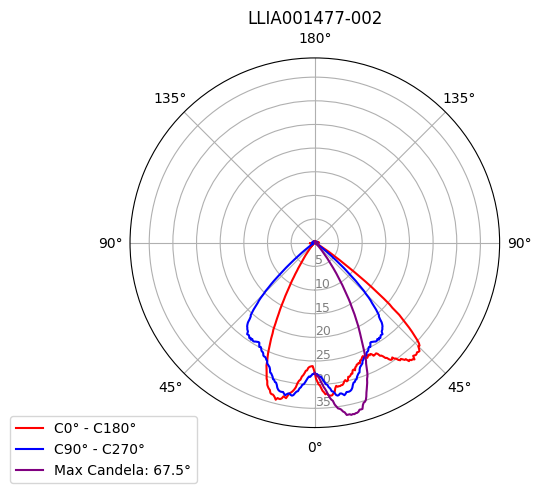

In [434]:
import matplotlib.pyplot as plt
import numpy as np

test_ies_files = list(Path('./tests/ies_files').iterdir())
fname = test_ies_files[2]
# for fname in test_ies_files:
# read

def plot_valdict_polar(valdict, title="",figsize=(6.4, 4.8)):
    values = valdict['values']
    thetas = valdict['thetas']
    phis = valdict['phis']
    
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},figsize=figsize)
    
    # left and right 'sides' of the plot
    theta1 = np.radians(thetas)
    theta2 = np.radians((thetas+180)[1:])
    
    # c0-c180
    try:
        r1 = values[phis==0][0]
        ax.plot(theta1, r1, color='red',label='C0° - C180°')
    except:
        msg = "Phi values for 0 degrees not found"
        warnings.warn(msg)
    try:
        r2 = values[phis==180][0]
        r2 = np.flip(r2)[1:]        
        ax.plot(theta2, r2, color='red',label='C0° - C180°')
    except:
        msg = "Phi values for 180 degrees not found"
        warnings.warn(msg)        
    
    # c90-c270
    try:
        r3 = values[phis==90][0]
        ax.plot(theta1, r3, color='blue',label='C90° - C270°')
    except:
        msg = "Phi values for 90 degrees not found"
        warnings.warn(msg)
    try:
        r4 = values[phis==270][0]
        r4 = np.flip(r4)[1:]
        ax.plot(theta2, r4, color='blue',label='C90° - C270°')
    except:
        msg = "Phi values for 90 degrees not found"
        warnings.warn(msg)
    
    # max candela
    max_candela_phi = phis[np.argmax(np.max(values, axis=1))]
    if max_candela_phi not in [0,90,180,270]:
        r5 = values[phis==max_candela_phi][0]
        label = 'Max Candela: '+str(max_candela_phi)+"°"
        ax.plot(theta1, r5, color='purple',label=label)    
    
    # plot formatting 
    ax.set_theta_zero_location("S")
    ax.set_rlabel_position(0)  # Move radial labels away from plotted line
    plt.setp(ax.get_yticklabels(), alpha=0.5, rotation=45,fontsize=9)
    ax.grid(True)
    ax.set_title(title)
    
    # relabel tick marks
    labs = ax.get_xticklabels()[0:5]
    morelabs = labs.copy()
    morelabs.reverse()
    newlabs = labs[:-1]+morelabs[:-1]
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(newlabs)

    #legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(),bbox_to_anchor=[0,0,0.2,0.05])
    
    return fig, ax

lampdict = read_ies_data(fname)    
fig, ax = plot_valdict_polar(lampdict['full_vals'],title=fname.stem)